# MATH 210 Project 2: Employment Rate Related to Different Economic Sectors

The [employment rate](http://www.statcan.gc.ca/daily-quotidien/160205/dq160205a-eng.htm) is one of the economic indicators that people uses to examine and understand the state of the economy. The [labour force](https://en.wikipedia.org/wiki/Workforce) is all the members of a particular organization or population who are able to work, for example, all the workers in a country is a labour force. We often calculate the employment rate by the number of employments divided by the total labour force as a percentage.
The [economic sectors](https://en.wikipedia.org/wiki/Primary_sector_of_the_economy) include primary sector, secondary sector and teriary sector. We are going to study the number of employments related to different sectors which are agriculture(primary sector), industry including construction(secondary sector), manufacturing(secondary sector) and sevices(teriary sector) using the [OECD Employment Outlook 2015](http://www.oecd-ilibrary.org/docserver/download/8115141e.pdf?expires=1460593295&id=id&accname=ocid194914a&checksum=6F7F50ABBDC914BE9734B33C73264E3C) dataset from the [OECD Data](https://data.oecd.org/emp/employment-by-activity.htm#indicator-chart). The dataset that I select includes the Employment by Activity and Labour Force.

We will study the number of employments and calculate the employment rates of each activities in different countries from 2005 to 2015.

The questions we address are:

1. From 2005 to 2015, what are the tends of those four activities' employment rates in Canada?
2. Which activity has the highest avearage employment rate from 2005 to 2015?
3. Canada is a developed country and Chile is a developing country, so what are the differences of each sectors between these two countries?  
4. From 2005 to 2015, what are the tends of employment rates of each activity?

## Executive Summary

1. The employment rate of agriculture, manufacture and industry including construction all decrease, while the employment rate in service remains at approximately 75%.
2. Service has the highest average employment rate from 2005 to 2015.
3. Canada has higher employment rate in service(70%) than Chile(60%), but Chile has higher employment rates in agriculture, manufacture, and industry including construction than Canada.
4. Service, which has the highest employment rate, has a slightly increase over the 11 years, while the employment rate of manufacture and industry including constrcution slightly decrease. The employment rate of agriculture remain quite steable.


## Table of Contents

1. Introducing the data
2. Employment Rate Related to Different Economic Sectors
  * The tends of employment rate of different activities in Canada from 2005 to 2015
  * The activity which has the highest avearage employment rate in 2014
  * The difference of employment rate of each activity between Canada and Chile

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introducing the data



In [4]:
employment=pd.read_csv('employment rate.csv',encoding='latin')

In [5]:
employment.head()

,LOCATION,ACTIVITY,MEASURE,TIME,EMPLOYMENT,TOTAL LABOUR FORCE
0,AUS,AGR,THND_PER,2005,352.7252,10398.96
1,AUS,AGR,THND_PER,2006,344.1808,10628.37
2,AUS,AGR,THND_PER,2007,345.5932,10908.33
3,AUS,AGR,THND_PER,2008,344.7386,11202.19
4,AUS,AGR,THND_PER,2009,348.4926,11438.96


In [6]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 6 columns):
LOCATION              1458 non-null object
ACTIVITY              1458 non-null object
MEASURE               1458 non-null object
TIME                  1458 non-null int64
EMPLOYMENT            1458 non-null float64
TOTAL LABOUR FORCE    1458 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 79.7+ KB


There are 1458 rows and 6 columns. Each row represents a country, and the name of each country is recorded as three Initial Letters, which is respectively:
 
  * AUS -- Australia
  * AUT -- Austria
  * BEL -- Belgium
  * CAN -- Canada
  * CHE -- Switzerland
  * CHL -- Chile
  * CZE -- Czech Republic
  * DEU -- Germany
  * DNK -- Denmark
  * ESP -- Spain
  * EST -- Estonia
  * FIN -- Finland
  * FRA -- France
  * GBR -- United Kingdom
  * GRC -- Greece
  * HUN -- Hungary
  * IRL -- Ireland
  * ISL -- Iceland
  * ISR -- Isreal
  * ITA -- Italy
  * JPN -- Japan
  * KOR -- Korea
  * LUX -- Luxembourg
  * MEX -- Mexico
  * NLD -- Netherlands
  * NOR -- Norway
  * NZL -- New Zealand
  * POL -- Poland
  * PRT -- Portugal
  * SVK -- Slovak Republic
  * SVN -- Slovenia
  * SWE -- Sweden
  * TUR -- Turkey
  * USA -- United States
  
The columns are as follows(see the [explanation](http://www.oecd-ilibrary.org/docserver/download/8115141e.pdf?expires=1460593295&id=id&accname=ocid194914a&checksum=6F7F50ABBDC914BE9734B33C73264E3C) accompanying the data file):
  
  * LOCATION: the country
  * Activity: different activities in different sectors, including agriculture, industry including construction, manufacture and service
  * MEASURE: thousand persons
  * TIME: the year
  * EMPLOYMENT: number of employments
  * TOTAL LABOUR FORCE: the total labour force of all the sectors in a whole year


### Calculate the Employment Rate of Each Activity in Each Country in Each Year

The employment rate equals to the number of employment divided by the total labour force.
Therefore, we need to divide the column `EMPLOYMENT` by the column `TOTAL LABOUR FORCE`.

In [7]:
employment['EMPLOYMENT RATE']= employment['EMPLOYMENT'] / employment['TOTAL LABOUR FORCE']

In [8]:
employment.head()

,LOCATION,ACTIVITY,MEASURE,TIME,EMPLOYMENT,TOTAL LABOUR FORCE,EMPLOYMENT RATE
0,AUS,AGR,THND_PER,2005,352.7252,10398.96,0.033919
1,AUS,AGR,THND_PER,2006,344.1808,10628.37,0.032383
2,AUS,AGR,THND_PER,2007,345.5932,10908.33,0.031682
3,AUS,AGR,THND_PER,2008,344.7386,11202.19,0.030774
4,AUS,AGR,THND_PER,2009,348.4926,11438.96,0.030465


From the table, we successfully calculate and add the `EMPLOYMENT RATE` column.

## 2. Employment Rate Related to Different Economic Sectors

### 2.1 The tends of the employment rate of each activity in Canada from 2005 to 2015.

We want to find out whether the employment rate of each activity is increasing, decreasing or remain steady in Canada from 2005 to 2015. We can plot the graph, and get direct response from the graph.

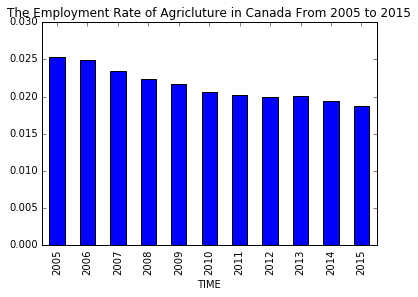

In [20]:
employment[(employment['ACTIVITY'] == 'AGR')& (employment['LOCATION'] == 'CAN') ].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(kind='bar', title='The Employment Rate of Agricluture in Canada From 2005 to 2015');

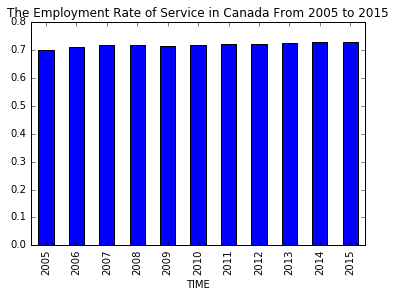

In [18]:
employment[(employment['ACTIVITY'] == 'SERV') & (employment['LOCATION'] == 'CAN')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(kind='bar', title='The Employment Rate of Service in Canada From 2005 to 2015');

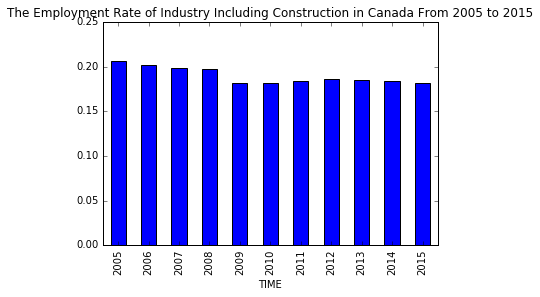

In [19]:
employment[(employment['ACTIVITY'] == 'INDUSCONSTR') & (employment['LOCATION'] == 'CAN')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(kind='bar', title='The Employment Rate of Industry Including Construction in Canada From 2005 to 2015');

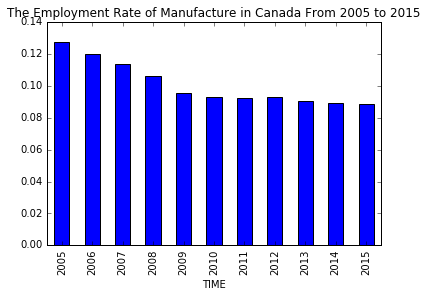

In [21]:
employment[(employment['ACTIVITY'] == 'MFG')& (employment['LOCATION'] == 'CAN') ].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(kind='bar', title='The Employment Rate of Manufacture in Canada From 2005 to 2015');

From the four graphs, we can see that from 2005 to 2015, the employment rate of agriculture in Canada decreases from 2.5% to below 2%; the employment of service remains steady around slightly over 70%; the employment in industry including construction slightly decreases; and the employment of manufacture is decreasing from 13% to 9%.

### 2.2 The Activity Which has the highest Employment Rate from 2005 to 2015

Then, let's plot the avearage employment rate of each activity from 2005 to 2015.

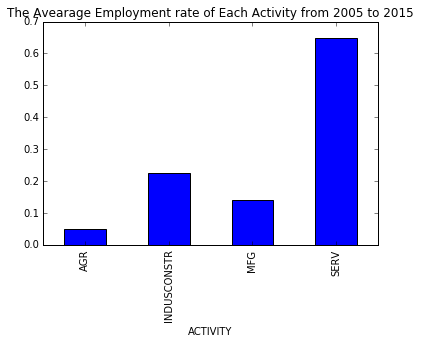

In [23]:
employment.groupby('ACTIVITY')['EMPLOYMENT RATE'].mean().plot(kind='bar',title='The Avearage Employment rate of Each Activity from 2005 to 2015');

It is clear that service, as a teriary sector, has the highest avearage employment rate from 2005 to 2015, which is close to 65%.

### 2.3 The differences in each sectors between Canada and Mexico

From the first quqestion, the employment rate of agriculture, industry including construction and manufacture in Canada all decreases from 2005 to 2015, while the employment in service remain steady which is approximately 70%. Let's plot the avearage employment rates in Canada and Chile, and compare between them.

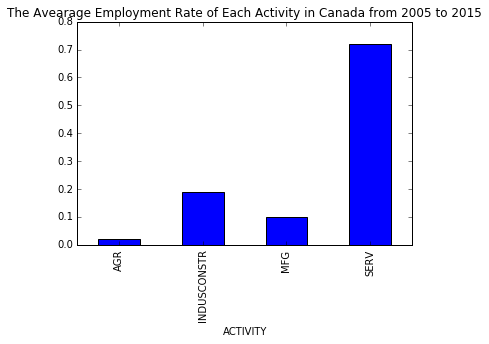

In [14]:
employment[employment['LOCATION'] == 'CAN'].groupby('ACTIVITY')['EMPLOYMENT RATE'].mean().plot(kind='bar',title='The Avearage Employment Rate of Each Activity in Canada from 2005 to 2015');

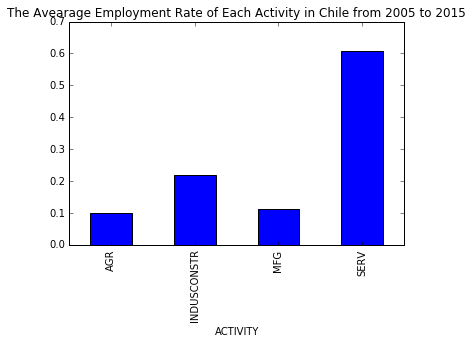

In [15]:
employment[employment['LOCATION'] == 'CHL'].groupby('ACTIVITY')['EMPLOYMENT RATE'].mean().plot(kind='bar',title='The Avearage Employment Rate of Each Activity in Chile from 2005 to 2015');

From the graphs above, Canada has a very high employment rate in service, which is almost 75%, but it has a very low employment rate in agriculture and manufacture. In addition, compared to Canada, Chile also has high employment rate in service which is 60% lower than Canada. Chile has higher emloyment rates in Agriculture, manufacture and industry including construction than Canada.

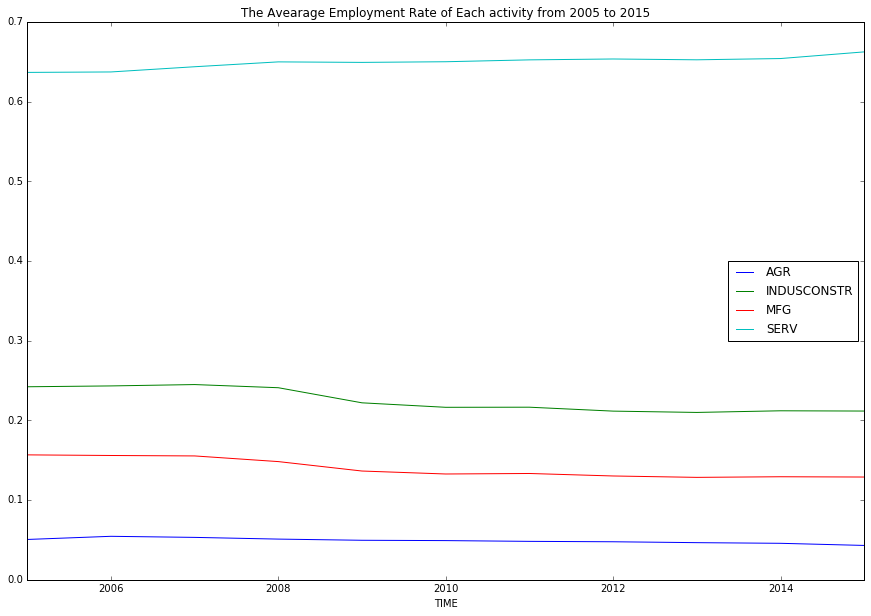

In [47]:
employment[(employment['ACTIVITY'] == 'AGR')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(label='AGR');
employment[(employment['ACTIVITY'] == 'INDUSCONSTR')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(label='INDUSCONSTR');
employment[(employment['ACTIVITY'] == 'MFG')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(label='MFG');
employment[(employment['ACTIVITY'] == 'SERV')].groupby('TIME')['EMPLOYMENT RATE'].mean().plot(label='SERV',title='The Avearage Employment Rate of Each activity from 2005 to 2015',figsize=(15,10),);
plt.legend(loc='best');



### Conclusion:

 From the graph, service, which has the highest employment rate(around 65%), has a slightly increase over the 11 years. However,the employment rate of manufacture and industry including constrcution slightly decrease. And,the employment rate of agriculture remain quite steable(around 5%).
